In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

606

In [5]:
# Import our dependencies
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

from datetime import datetime

In [6]:
# Build basic URL for the OpenWeatherMap with weather_api_key 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters 
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
        
        # Group cities in sets of 50 for logging purposes
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
        # Create endpoint URL with each city
        city_url = url + "&q=" + city.replace(" ","+")
        
        # Log the URL, record, and set numbers and the city
        print(f"Processing Record {record_count} of Set {set_count} | {city}")

        # Add 1 to the record count
        record_count += 1

        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | pochutla
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | mitsamiouli
Processing Record 9 of Set 1 | ipira
Processing Record 10 of Set 1 | bahia blanca
Processing Record 11 of Set 1 | chiche
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | keti bandar
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | zhangye
Processing Record 22 of Se

Processing Record 35 of Set 4 | avarua
Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | tarquinia
Processing Record 38 of Set 4 | khonuu
City not found. Skipping...
Processing Record 39 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | paamiut
Processing Record 42 of Set 4 | alexandria
Processing Record 43 of Set 4 | russell
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | kloulklubed
Processing Record 46 of Set 4 | henties bay
Processing Record 47 of Set 4 | de-kastri
Processing Record 48 of Set 4 | mumbwa
Processing Record 49 of Set 4 | coffs harbour
Processing Record 50 of Set 4 | hoopstad
Processing Record 1 of Set 5 | butterworth
Processing Record 2 of Set 5 | faya
Processing Record 3 of Set 5 | otradinskiy
City not found. Skipping...
Processing Record 4 of Set 5 | sangar
Processing Record 5 of Set 5 | karamea
City not found. Skipping...
Processing Record 6 of Se

Processing Record 22 of Set 8 | itarema
Processing Record 23 of Set 8 | kruisfontein
Processing Record 24 of Set 8 | phenix city
Processing Record 25 of Set 8 | chegdomyn
Processing Record 26 of Set 8 | pingdingshan
Processing Record 27 of Set 8 | ancud
Processing Record 28 of Set 8 | caluquembe
Processing Record 29 of Set 8 | alofi
Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | yaan
Processing Record 32 of Set 8 | saskylakh
Processing Record 33 of Set 8 | kuragino
Processing Record 34 of Set 8 | rabak
Processing Record 35 of Set 8 | khatanga
Processing Record 36 of Set 8 | port elizabeth
Processing Record 37 of Set 8 | high level
Processing Record 38 of Set 8 | muravlenko
Processing Record 39 of Set 8 | susehri
Processing Record 40 of Set 8 | san martin
Processing Record 41 of Set 8 | pine bluff
Processing Record 42 of Set 8 | ewa beach
Processing Record 43 of Set 8 | kem
Processing Record 44 of Set 8 | mehran
Processing Record 45 of Set 8 | puerto nar

Processing Record 12 of Set 12 | leh
Processing Record 13 of Set 12 | jaguaribe
Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | kamakwie
Processing Record 16 of Set 12 | rawah
Processing Record 17 of Set 12 | beitbridge
Processing Record 18 of Set 12 | tazmalt
Processing Record 19 of Set 12 | palmerston
Processing Record 20 of Set 12 | popondetta
Processing Record 21 of Set 12 | saint-junien
Processing Record 22 of Set 12 | seoul
Processing Record 23 of Set 12 | manokwari
Processing Record 24 of Set 12 | naryan-mar
Processing Record 25 of Set 12 | dunedin
Processing Record 26 of Set 12 | tilichiki
Processing Record 27 of Set 12 | tigil
Processing Record 28 of Set 12 | tucumcari
Processing Record 29 of Set 12 | urumqi
Processing Record 30 of Set 12 | romilly-sur-seine
Processing Record 31 of Set 12 | yongan
Processing Record 32 of Set 12 | coralville
Processing Record 33 of Set 12 | mahibadhoo
Processing Record 34 of Set 12 | atsiki
City not found. Skipping..

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pochutla,15.7432,-96.4661,88.83,73,59,5.53,MX,2021-10-28 21:07:30
1,Castro,-24.7911,-50.0119,64.83,91,91,10.07,BR,2021-10-28 21:07:31
2,Severo-Kurilsk,50.6789,156.1250,42.12,91,100,7.74,RU,2021-10-28 21:06:10
3,Victoria,22.2855,114.1577,77.38,88,84,1.99,HK,2021-10-28 21:05:58
4,Kapaa,22.0752,-159.3190,82.38,89,75,3.00,US,2021-10-28 21:07:32
5,Mitsamiouli,-11.3847,43.2844,79.21,75,9,0.92,KM,2021-10-28 21:07:32
6,Ipira,-12.1583,-39.7372,77.14,68,26,16.71,BR,2021-10-28 21:07:33
7,Bahia Blanca,-38.7196,-62.2724,97.79,10,100,17.60,AR,2021-10-28 21:07:33
8,Chiche,15.0086,-91.0650,71.15,52,16,8.75,GT,2021-10-28 21:07:34
9,Port Alfred,-33.5906,26.8910,66.90,96,100,4.54,ZA,2021-10-28 21:07:34


In [9]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pochutla,MX,2021-10-28 21:07:30,15.7432,-96.4661,88.83,73,59,5.53
1,Castro,BR,2021-10-28 21:07:31,-24.7911,-50.0119,64.83,91,91,10.07
2,Severo-Kurilsk,RU,2021-10-28 21:06:10,50.6789,156.1250,42.12,91,100,7.74
3,Victoria,HK,2021-10-28 21:05:58,22.2855,114.1577,77.38,88,84,1.99
4,Kapaa,US,2021-10-28 21:07:32,22.0752,-159.3190,82.38,89,75,3.00
5,Mitsamiouli,KM,2021-10-28 21:07:32,-11.3847,43.2844,79.21,75,9,0.92
6,Ipira,BR,2021-10-28 21:07:33,-12.1583,-39.7372,77.14,68,26,16.71
7,Bahia Blanca,AR,2021-10-28 21:07:33,-38.7196,-62.2724,97.79,10,100,17.60
8,Chiche,GT,2021-10-28 21:07:34,15.0086,-91.0650,71.15,52,16,8.75
9,Port Alfred,ZA,2021-10-28 21:07:34,-33.5906,26.8910,66.90,96,100,4.54


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

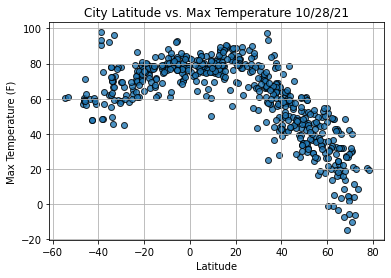

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

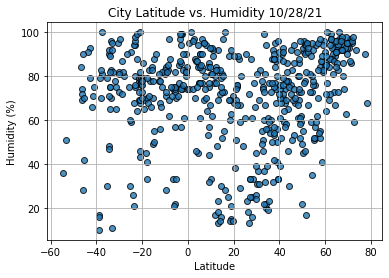

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

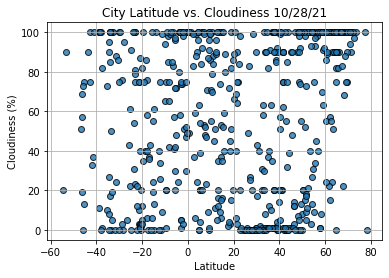

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

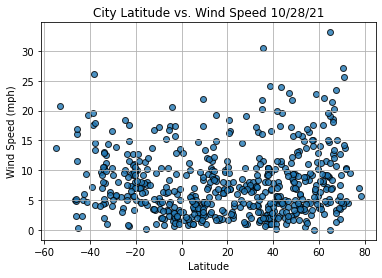

In [15]:
# Build the scatter plot for latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph propertirs
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [17]:
index13 = city_data_df.loc[13]
index13

City                      Husavik
Country                        IS
Date          2021-10-28 21:07:35
Lat                       66.0449
Lng                      -17.3389
Max Temp                    39.78
Humidity                       97
Cloudiness                    100
Wind Speed                  18.52
Name: 13, dtype: object

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pochutla,MX,2021-10-28 21:07:30,15.7432,-96.4661,88.83,73,59,5.53
2,Severo-Kurilsk,RU,2021-10-28 21:06:10,50.6789,156.1250,42.12,91,100,7.74
3,Victoria,HK,2021-10-28 21:05:58,22.2855,114.1577,77.38,88,84,1.99
4,Kapaa,US,2021-10-28 21:07:32,22.0752,-159.3190,82.38,89,75,3.00
8,Chiche,GT,2021-10-28 21:07:34,15.0086,-91.0650,71.15,52,16,8.75


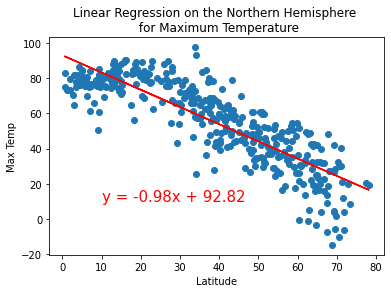

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10, 10))

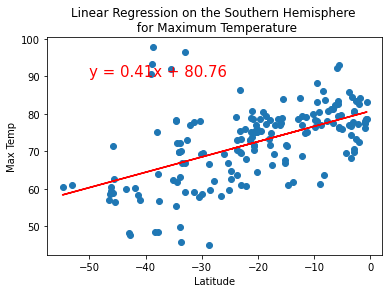

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-50, 90))

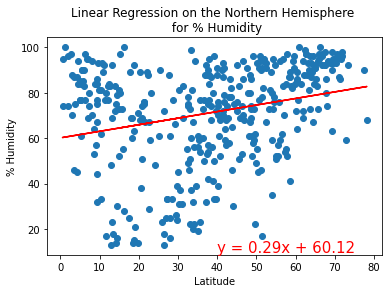

In [21]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (40, 10))

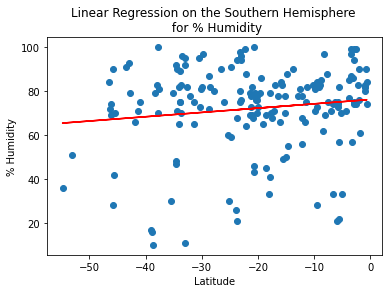

In [22]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-30, 0))

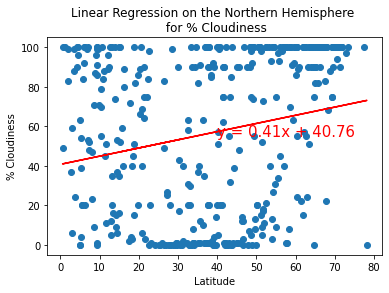

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (40, 55))

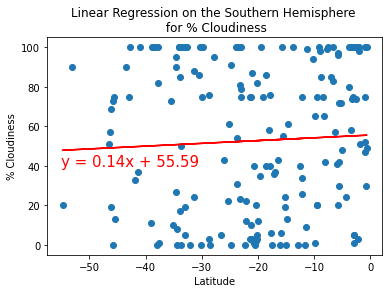

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-55, 40))

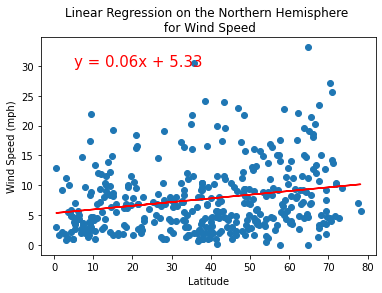

In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (5, 30))

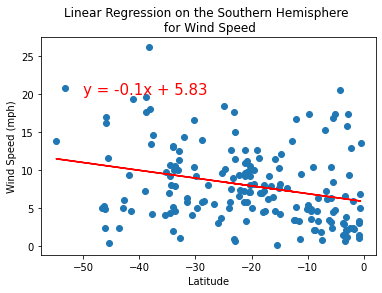

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (-50, 20))